In [1]:
# Игнорирем предупреждения
import warnings
warnings.filterwarnings('ignore')

#### Импортируем библиотеки необходимые для работы

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#### Загрузка данных 


In [3]:
house_boston = load_boston()

In [4]:
df = pd.DataFrame(data = house_boston.data, columns = house_boston.feature_names)

In [5]:
df["MEDV"] = house_boston.target

1)	CRIM – уровень преступности на душу населения в разбивке по населенным пунктам. 

2)	ZN – доля жилой земли, зонированной на участки площадью более 25 000 кв.футов.

3)	INDUS – доля промышленных площадей, не связанных с розничной торговлей, в расчете на город.

4)	CHAS – категориальный признак. Переменная равняется 1 – если транспортная дорога граничит с рекой Charles River, в противном случае 0.

5)	NOX – концентрация оксидов азота. 

6)	RM – среднее количество комнат в жилом помещении.

7)	AGE – доля квартир, занятых владельцами, в домах, которые были построены до 1940 г. 

8)	DIS – взвешенные расстояния до центров занятости в Бостоне. 

9)	RAD – индекс доступности к радиальным магистралям. 

10)	TAX – ставка налога на недвижимость с полной стоимостью за 10 000 долларов США.

11)	PTRATIO – соотношение учащихся и учителей в разбивке по городам.

12)	B – доля чернокожего населения. Считается данная метрика по формуле 1000(Bk - 0,63)^2.

13)	LSTAT – процент более низкого статуса населения.

14) MEDV - средняя стоимость домов, занятых владельцами, где стоимость указана в тысячах долларов. Целевая переменная. 


##### Данная задача является задачей регрессии, так как целевая переменная представляет собой бесконечное множество вариантов

### Предварительный анализ

#### Вывод информации о количественных характеристиках датасета

In [6]:
df.shape

(506, 14)

#### Вывод информации об отсутствующих значениях и характеристиках

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


#### Вывод нескольких точек данных для иллюстрации структуры данных.


In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Описательный анализ данных

In [9]:
df[df.columns[:7]].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000


In [10]:
df[df.columns[7:]].describe()

,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


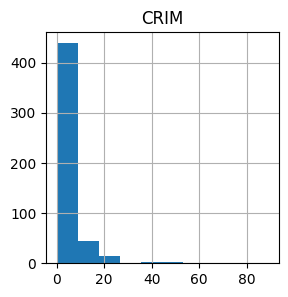

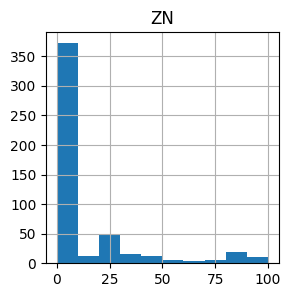

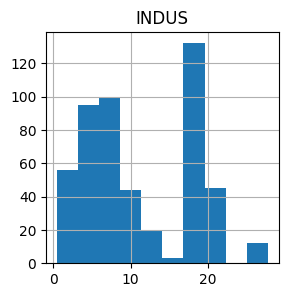

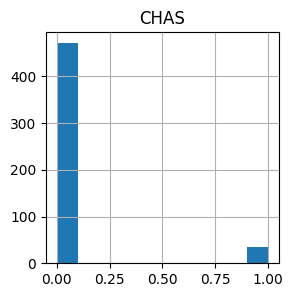

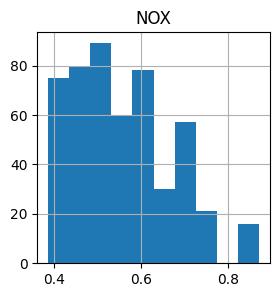

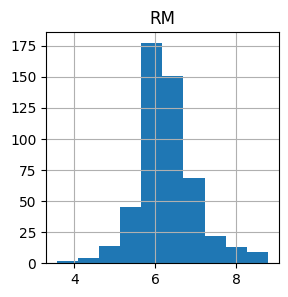

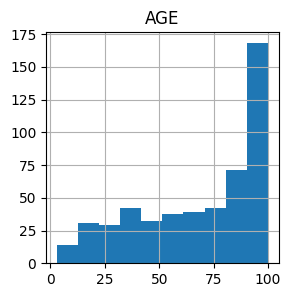

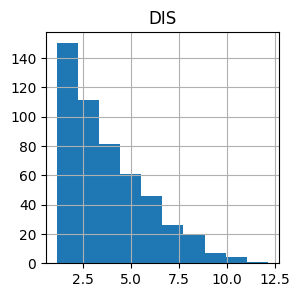

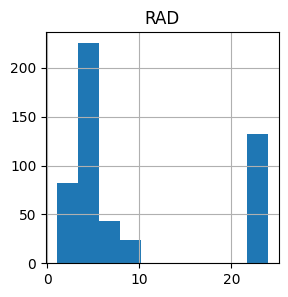

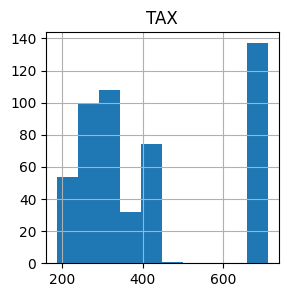

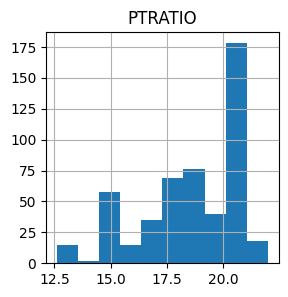

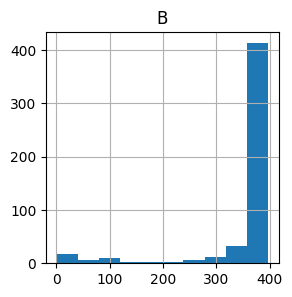

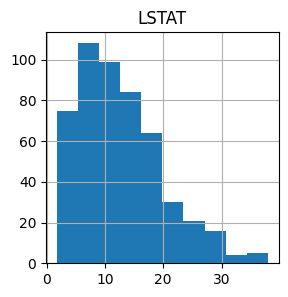

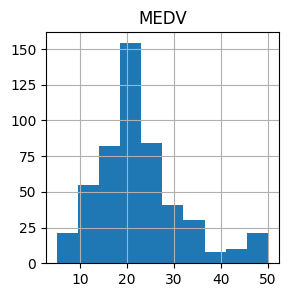

In [11]:
for col in df.columns:
    df[col].hist(figsize=(3, 3))
    plt.title(col)
    plt.show()

Признак CHAS имеет всего 2 варианта из чего следует, что это категориальный признак.

Признаки RM и MEDV имеют распределение, близкое к нормальному.

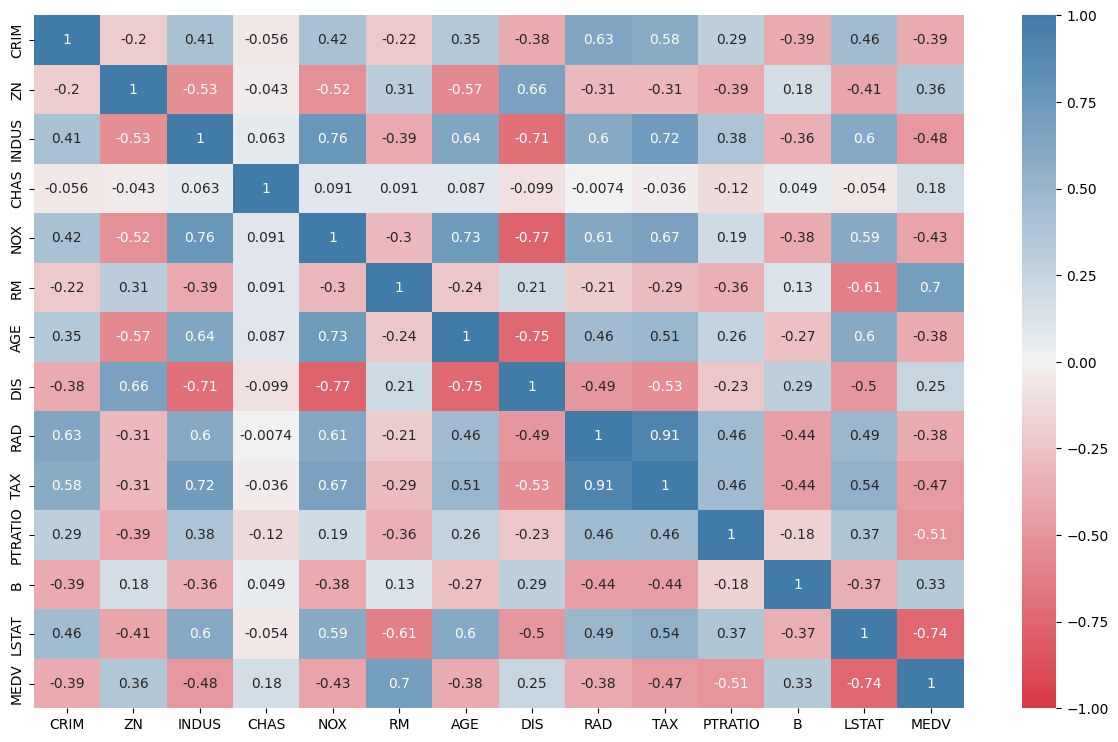

In [12]:
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(
    df.corr().round(5),
    annot=True,
    annot_kws={'size': 10},
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 240, n=200))
plt.show()

Из рисунка видно, что между признаками TAX и RAD имеет место быть значимая положительная корреляция, близкая к единице. Из этого следует, что один из признаков можно удалить.

In [13]:
df = df.drop('RAD', axis = 1)

### Разделение набора данных на обучающую и тестовую выборки

In [14]:
X = df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]]
Y = df["MEDV"]

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

### Обучение моделей

#### «Случайный лес»

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, Y_train)

cv_score_random_forest = cross_val_score(random_forest,X_train, Y_train, cv=4).mean()

score_random_forest = random_forest.score(X_test, Y_test)

print('Score на train = %0.4f' % cv_score_random_forest)
print('Score на test = %0.4f' % score_random_forest)

Score на train = 0.8330
Score на test = 0.8636


«Случайный лес» дал хороший результат

#### Градиентный бустинг

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

In [19]:
gradient_boosted = GradientBoostingRegressor()
gradient_boosted.fit(X_train, Y_train)

cv_score_gradient_boosted = cross_val_score(gradient_boosted,X_train, Y_train, cv=4).mean()

score_gradient_boosted = gradient_boosted.score(X_test, Y_test)

print('Score на train = %0.4f' % cv_score_gradient_boosted)
print('Score на test = %0.4f' % score_gradient_boosted)

Score на train = 0.8520
Score на test = 0.8817


Градиентный бустинг дал хороший результат

#### Деревья решений

In [20]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)

cv_score_decision_tree = cross_val_score(decision_tree,X_train, Y_train, cv=4).mean()

score_decision_tree = decision_tree.score(X_test, Y_test)

print('Score на train = %0.4f' % cv_score_decision_tree)
print('Score на test = %0.4f' % score_decision_tree)

Score на train = 0.7460
Score на test = 0.7862


Деревья решений дали результат значительно хуже относительно других моделей

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [59]:
Y_pred = decision_tree.predict(X_test)

print('Средняя квадратическая ошибка = %0.4f' % mean_squared_error(Y_test, Y_pred))
print('Средняя абсолютная ошибка = %0.4f' % mean_absolute_error(Y_test, Y_pred))

MSE = 21.1339
MAE = 3.3026


#### Оценка качества моделей со стандартным набором гиперпараметров

In [22]:
cross_validation_score = [cv_score_random_forest, cv_score_gradient_boosted, cv_score_decision_tree]
score = [score_random_forest ,score_gradient_boosted ,score_decision_tree]
name = ['Случайный лес', 'Градиентный бустинг', 'Деревья решений']

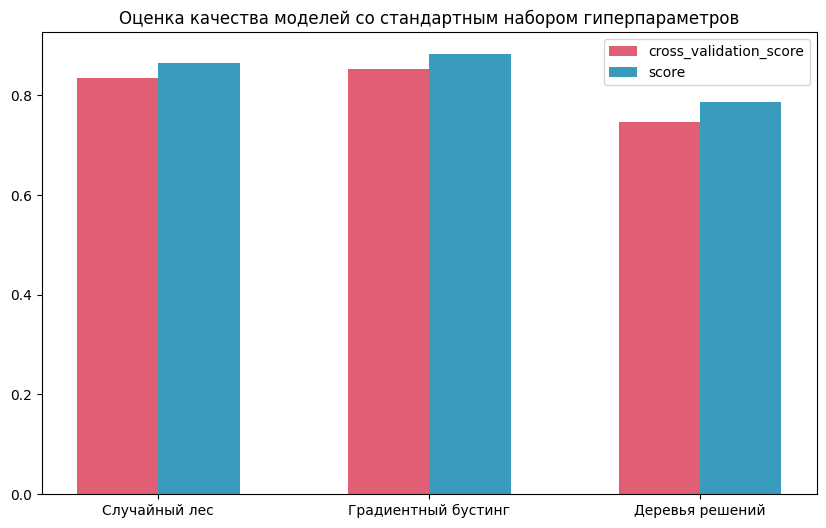

In [23]:
width = 0.3
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
cross_validation_bar = ax.bar(x - width/2, cross_validation_score, width, label='cross_validation_score', color= '#e25e74')
score_bar = ax.bar(x + width/2, score, width, label='score', color='#399cbd')
ax.set_title('Оценка качества моделей со стандартным набором гиперпараметров')
ax.set_xticks(x)
ax.set_xticklabels(name)
ax.legend()
plt.show()

### Усовершенствование модели с помощью оптимизации гиперпараметров 

In [24]:
param_optimization = {'criterion': ['squared_error', "friedman_mse", 'absolute_error', "poisson"],
               'max_depth': list(np.linspace(2, 100, 20, dtype = int)) + [None],
               'min_samples_leaf': list(np.linspace(1, 100, 10, dtype = int)),
               'min_samples_split': list(np.linspace(1, 100, 10, dtype = int))}

#### Random Search

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
%%time
decision_tree = DecisionTreeRegressor()
decision_tree_model_random_search = RandomizedSearchCV(estimator = decision_tree, param_distributions = param_optimization, n_iter = 100, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)

decision_tree_model_random_search.fit(X_train,Y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Wall time: 2.18 s


RandomizedSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 7, 12, 17, 22, 27, 32,
                                                      38, 43, 48, 53, 58, 63,
                                                      69, 74, 79, 84, 89, 94,
                                                      100, None],
                                        'min_samples_leaf': [1, 12, 23, 34, 45,
                                                             56, 67, 78, 89,
                                                             100],
                                        'min_samples_split': [1, 12, 23, 34, 45,
            

In [27]:
decision_tree_model_random_search.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_depth': 100,
 'criterion': 'friedman_mse'}

In [28]:
cv_score_decision_tree_random_search = cross_val_score(decision_tree_model_random_search,X_train, Y_train, cv=4).mean()

score_decision_tree_random_search = decision_tree_model_random_search.score(X_test, Y_test)

print('Score на train = %0.4f' % cv_score_decision_tree_random_search)
print('Score на test = %0.4f' % score_decision_tree_random_search)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
Fitting 4 folds for each of 100 candidates, totalling 400 fits
Fitting 4 folds for each of 100 candidates, totalling 400 fits
Fitting 4 folds for each of 100 candidates, totalling 400 fits
Score на train = 0.7347
Score на test = 0.8145


#### Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
%%time
decision_tree = DecisionTreeRegressor()
decision_tree_model_grid_search = GridSearchCV(estimator = decision_tree, param_grid = param_optimization, cv = 4, verbose= 1, n_jobs = -1)

decision_tree_model_grid_search.fit(X_train,Y_train)

Fitting 4 folds for each of 8400 candidates, totalling 33600 fits
Wall time: 1min


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 7, 12, 17, 22, 27, 32, 38, 43, 48, 53,
                                       58, 63, 69, 74, 79, 84, 89, 94, 100,
                                       None],
                         'min_samples_leaf': [1, 12, 23, 34, 45, 56, 67, 78, 89,
                                              100],
                         'min_samples_split': [1, 12, 23, 34, 45, 56, 67, 78,
                                               89, 100]},
             verbose=1)

In [31]:
decision_tree_model_grid_search.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 23}

In [32]:
cv_score_decision_tree_grid_search = cross_val_score(decision_tree_model_grid_search,X_train, Y_train, cv=4).mean()

score_decision_tree_grid_search = decision_tree_model_grid_search.score(X_test, Y_test)

print('Score на train = %0.4f' % cv_score_decision_tree_grid_search)
print('Score на test = %0.4f' % score_decision_tree_grid_search)

Fitting 4 folds for each of 8400 candidates, totalling 33600 fits
Fitting 4 folds for each of 8400 candidates, totalling 33600 fits
Fitting 4 folds for each of 8400 candidates, totalling 33600 fits
Fitting 4 folds for each of 8400 candidates, totalling 33600 fits
Score на train = 0.7824
Score на test = 0.8394


In [64]:
Y_pred = decision_tree_model_grid_search.predict(X_test)

print('Средняя квадратическая ошибка = %0.4f' % mean_squared_error(Y_test, Y_pred))
print('Средняя абсолютная ошибка = %0.4f' % mean_absolute_error(Y_test, Y_pred))

Средняя квадратическая ошибка = 15.9374
Средняя абсолютная ошибка = 2.7290


#### Оценка прироста качества модели от метода оптимизации

In [33]:
development_random_search = 100 * ((score_decision_tree_random_search - score_decision_tree) / score_decision_tree)
development_grid_search = 100 * ((score_decision_tree_grid_search - score_decision_tree) / score_decision_tree)

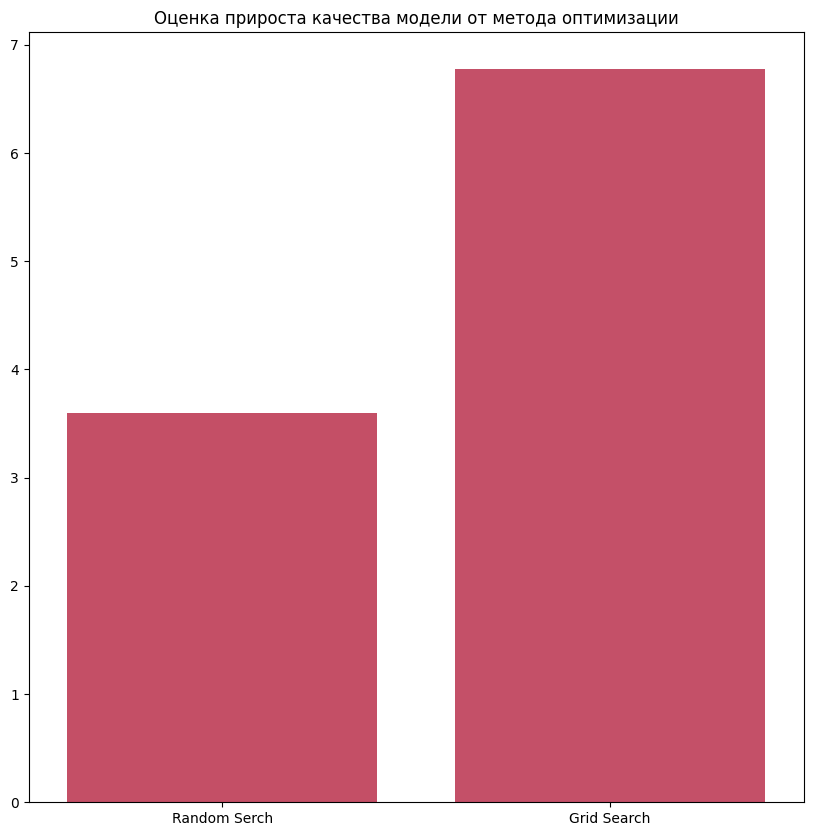

In [34]:
plt.subplots(figsize=(10, 10))
sns.barplot(['Random Serch', 'Grid Search'], [development_random_search, development_grid_search], palette=sns.diverging_palette(5, 240, n=200))
plt.title('Оценка прироста качества модели от метода оптимизации')
plt.show()

#### Оценка качества модели  с разными методами оптимизации гиперпараметров

In [35]:
cross_validation_score = [cv_score_decision_tree_random_search, cv_score_decision_tree_grid_search]
score = [score_decision_tree_random_search ,score_decision_tree_grid_search]
name = ['Random Serch', 'Grid Search']

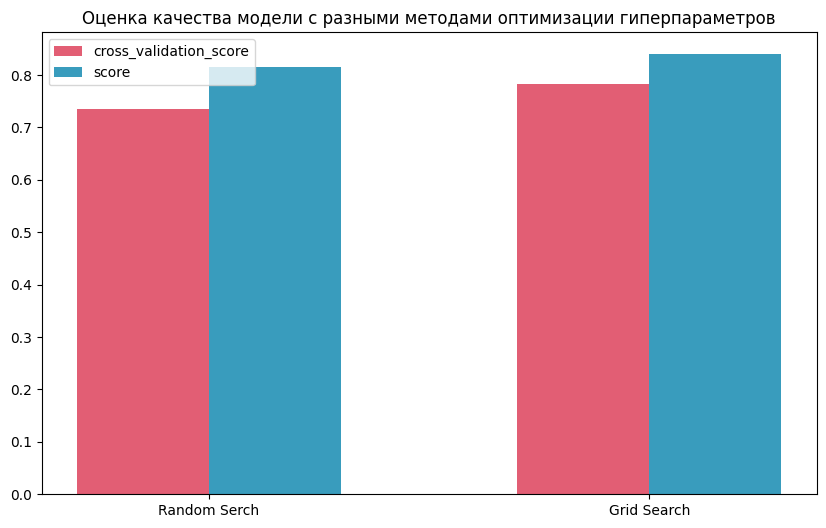

In [36]:
width = 0.3
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
cross_validation_bar = ax.bar(x - width/2, cross_validation_score, width, label='cross_validation_score', color= '#e25e74')
score_bar = ax.bar(x + width/2, score, width, label='score', color='#399cbd')
ax.set_title('Оценка качества модели с разными методами оптимизации гиперпараметров')
ax.set_xticks(x)
ax.set_xticklabels(name)
ax.legend()
plt.show()

### Усовершенствование модели с помощью отбора признаков

In [37]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
importance = decision_tree.feature_importances_

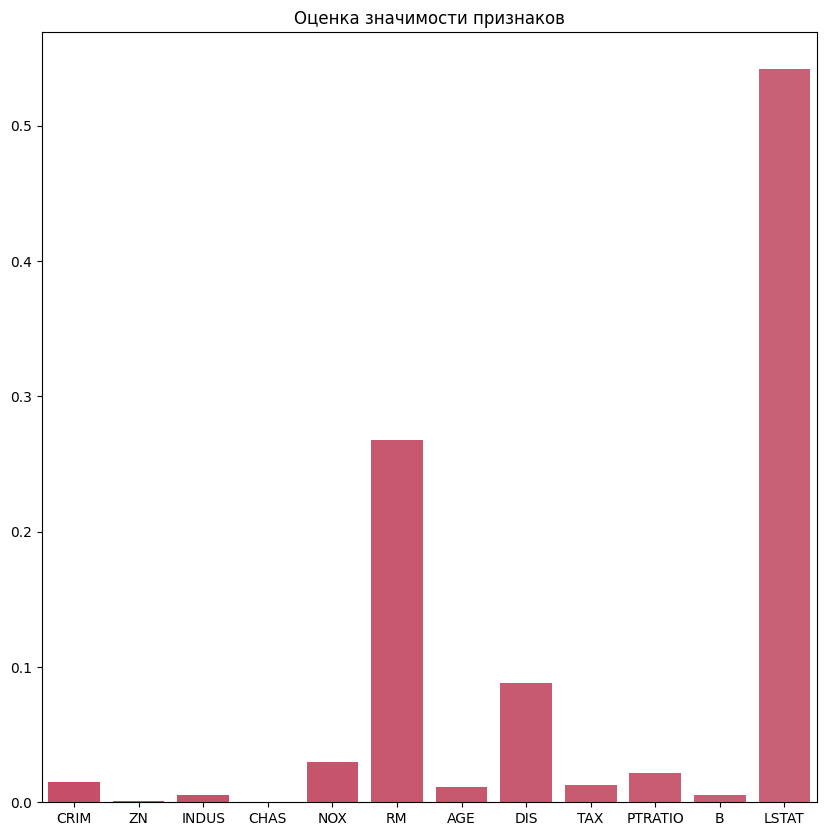

In [38]:
plt.subplots(figsize=(10, 10))
sns.barplot(["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"], importance, palette=sns.diverging_palette(5, 240, n=200))
plt.title('Оценка значимости признаков')
plt.show()

In [39]:
df_new = df.drop(['ZN','CHAS', 'AGE', 'B'], axis = 1)

##### Разделяем набор данных

In [40]:
X_new = df_new[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'TAX', 'LSTAT']]
Y_new = df_new['MEDV']

In [41]:
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size = 0.30, random_state = 101)

##### Обучаем модель

In [42]:
decision_tree_new = DecisionTreeRegressor()
decision_tree_new.fit(X_train_new, Y_train_new)

cv_score_decision_tree_new = cross_val_score(decision_tree_new, X_train_new, Y_train_new, cv=4).mean()

score_decision_tree_new = decision_tree_new.score(X_test_new, Y_test_new)

print('Score на train = %0.4f' % cv_score_decision_tree_new)
print('Score на test = %0.4f' % score_decision_tree_new)

Score на train = 0.7387
Score на test = 0.8198


In [62]:
Y_pred_new = decision_tree_new.predict(X_test_new)

print('Средняя квадратическая ошибка = %0.4f' % mean_squared_error(Y_test_new, Y_pred_new))
print('Средняя абсолютная ошибка = %0.4f' % mean_absolute_error(Y_test_new, Y_pred_new))

Средняя квадратическая ошибка = 17.8876
Средняя абсолютная ошибка = 3.1191


### Усовершенствование модели с помощью понижения размерности

In [43]:
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()

In [44]:
pca = PCA(n_components=.5)
pca.fit(df)
df_pca = pca.transform(df)

In [45]:
df_new_2 = pca.inverse_transform(df_pca)

In [46]:
df_new_2 = pd.DataFrame(data = df_new_2, columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

##### Разделяем набор данных

In [47]:
X_new_2 = df_new_2[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT"]]
Y_new_2 = df_new_2["MEDV"]

In [48]:
X_train_new_2, X_test_new_2, Y_train_new_2, Y_test_new_2 = train_test_split(X_new_2, Y_new_2, test_size = 0.30, random_state = 101)

##### Обучаем модель

In [49]:
decision_tree_new_2 = DecisionTreeRegressor()
decision_tree_new_2.fit(X_train_new_2, Y_train_new_2)

cv_score_decision_tree_new_2 = cross_val_score(decision_tree_new_2, X_train_new_2, Y_train_new_2, cv=4).mean()

score_decision_tree_new_2 = decision_tree_new_2.score(X_test_new_2, Y_test_new_2)

print('Score на train = %0.4f' % cv_score_decision_tree_new_2)
print('Score на test = %0.4f' % score_decision_tree_new_2)

Score на train = 0.9999
Score на test = 0.9999


In [61]:
Y_pred_new_2 = decision_tree_new_2.predict(X_test_new_2)

print('Средняя квадратическая ошибка = %0.4f' % mean_squared_error(Y_test_new_2, Y_pred_new_2))
print('Средняя абсолютная ошибка = %0.4f' % mean_absolute_error(Y_test_new_2, Y_pred_new_2))

Средняя квадратическая ошибка = 0.0020
Средняя абсолютная ошибка = 0.0162


### Результаты

In [50]:
cross_validation_score = [cv_score_decision_tree, cv_score_decision_tree_grid_search, cv_score_decision_tree_new, cv_score_decision_tree_new_2]
score = [score_decision_tree ,score_decision_tree_grid_search,score_decision_tree_new, score_decision_tree_new_2]
name = ['Стандартная модель', 'Grid Search', 'Отбор признаков', 'Понижение размерности']

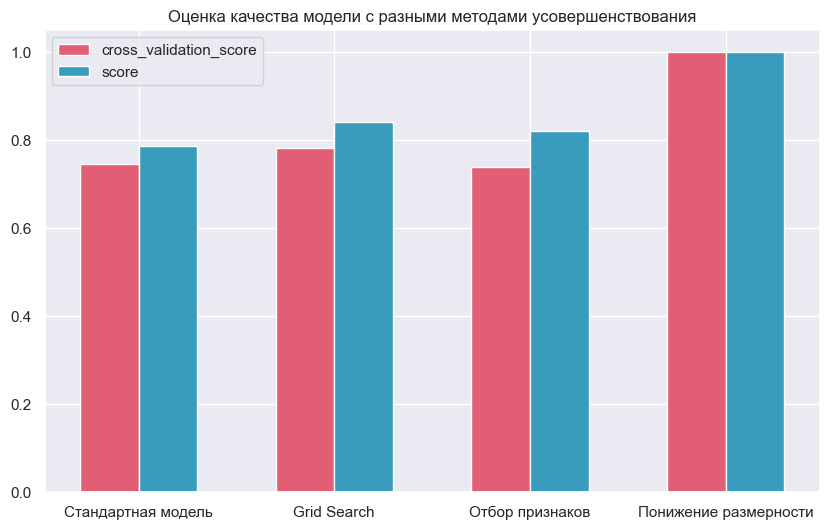

In [51]:
width = 0.3
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
cross_validation_bar = ax.bar(x - width/2, cross_validation_score, width, label='cross_validation_score', color= '#e25e74')
score_bar = ax.bar(x + width/2, score, width, label='score', color='#399cbd')
ax.set_title('Оценка качества модели с разными методами усовершенствования')
ax.set_xticks(x)
ax.set_xticklabels(name)
ax.legend()
plt.show()